# PROBLEM STATEMENT

- Given the times of a new normal since the COVID-19 pandemic, we know how most industries and sectors have forcibly transitioned from the traditional workspace to a work-from-home model. One of which endured digital adoption as no exception is the educational domain.The examination scenario is a complete game-changer. 
- In India, the intensity and importance are given to class 12 board examinations since they are considered a predetermining factor of a prosperous future. 
- Therefore, the commencement of the class 12 board exams was initially said to be conducted offline to bring back the efficacy of its traditional pattern; however, this comes with the opportunity cost of guaranteeing and safeguarding the students and public health.

# THE SIGNIFICANCE OF THE PROJECT

- The harsh reality of the Indian education system is that, most decisions students do not hold much of a role in conclusions drawn for them. 
- Thus, this project stands as a platform for their voices as it is necessary to research students perspectives. 

# DATA COLLECTION

- Data collection is done through the snowball sampling technique where primary contacts are asked to distribute the survey to their target acquaintances.

#### Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autocorrect import Speller
spell = Speller(lang='en')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

In [2]:
data = pd.read_csv("12th_Board_Exams_2021.csv")
data.head()

,Timestamp,Which board you are part of?,How do you feel when you are not aware of the status of your board exams? You may select more than one option given below:,What is your opinion about Class XII board exams?,"State the reasons for why do you want the exams to be cancelled? (Safety, Status of mind, Future plans, Health etc.)","State the reasons for why do you want the exams to be conducted on a later date? (Safety, Status of mind, Future plans, Entrance Exams, Health etc.)",Name the state from which you will be giving your XII Board exam(eg: Karnataka)
0,2021/05/14 6:47:27 PM GMT+5:30,ICSE,Anxious;Uncertain;Stress,Cannot Say,NaN,NaN,Kerala
1,2021/05/14 6:58:16 PM GMT+5:30,CBSE,Depressed;Uncertain;Inability to concentrate;C...,Should be cancelled,Health of my grandparents and family. I don't ...,NaN,KARNATAKA
2,2021/05/14 7:00:07 PM GMT+5:30,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,2021/05/14 7:06:53 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,2021/05/14 7:07:48 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka


# DATA UNDERSTANDING

1. Which board the students are studying in
2. What the students feel about their board exams
3. The students opinions on whether to cancel the exams or conduct it later
4. Why students want the board exams to be canceled
5. Why the students want the board exams to be conducted later
6. Which state the students are from

#### Renaming the header of each attribute

In [3]:
new_header = {'Timestamp':'timestamp','Which board you are part of?':'syllabus',
              'How do you feel when you are not aware of the status of your board exams? You may select more than one option given below:':'emotion',
              'What is your opinion about Class XII board exams?':'opinion',
              'State the reasons for why do you want the exams to be cancelled? (Safety, Status of mind, Future plans, Health etc.)':'reason_cancelling',
              'State the reasons for why do you want the exams to be conducted on a later date? (Safety, Status of mind, Future plans, Entrance Exams, Health etc.)':'reason_conduct_later',
              'Name the state from which you will be giving your XII Board exam(eg: Karnataka)':'state'}
data.rename(columns=new_header,inplace = True)
data.head()

,timestamp,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
0,2021/05/14 6:47:27 PM GMT+5:30,ICSE,Anxious;Uncertain;Stress,Cannot Say,NaN,NaN,Kerala
1,2021/05/14 6:58:16 PM GMT+5:30,CBSE,Depressed;Uncertain;Inability to concentrate;C...,Should be cancelled,Health of my grandparents and family. I don't ...,NaN,KARNATAKA
2,2021/05/14 7:00:07 PM GMT+5:30,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,2021/05/14 7:06:53 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,2021/05/14 7:07:48 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka


#### Sample size

In [4]:
len(data.index)

42640

#### Understanding the attributes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             42640 non-null  object
 1   syllabus              42635 non-null  object
 2   emotion               42635 non-null  object
 3   opinion               42635 non-null  object
 4   reason_cancelling     30138 non-null  object
 5   reason_conduct_later  8107 non-null   object
 6   state                 42640 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


In [6]:
data.describe()

,timestamp,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
count,42640,42635,42635,42635,30138,8107,42640
unique,37992,5,1167,3,20813,5123,2435
top,2021/05/18 7:52:30 PM GMT+5:30,State Board,Confused,Should be cancelled,Safety,Safety,Karnataka
freq,5,24566,3341,30133,2715,788,12695


#### Total number of null values

In [7]:
print(data.isna().sum())

timestamp                   0
syllabus                    5
emotion                     5
opinion                     5
reason_cancelling       12502
reason_conduct_later    34533
state                       0
dtype: int64


#### Removing Null Values

- Since there are only 5 null values in syllabus, emotion, and opinion attributes
- We are only removing rows which have null values in emotion.
- We find that only by removing null rows in emotion the attributes syllabus and opinion null values has also been removed

In [8]:
data.dropna(subset=["emotion"],inplace = True)
print(data.isna().sum())

timestamp                   0
syllabus                    0
emotion                     0
opinion                     0
reason_cancelling       12502
reason_conduct_later    34528
state                       0
dtype: int64


#### Removing first two rows

- Since the first two rows were used to test the survey we remove them

In [9]:
data = data.iloc[2:]
data.head()

,timestamp,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
2,2021/05/14 7:00:07 PM GMT+5:30,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,2021/05/14 7:06:53 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,2021/05/14 7:07:48 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka
5,2021/05/14 7:10:42 PM GMT+5:30,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,NaN,Ahmedabad
6,2021/05/14 7:10:46 PM GMT+5:30,State Board,Uncertain;Inability to concentrate;Confused,Cannot Say,NaN,NaN,State


In [10]:
len(data.index)

42633

#### Deleting the first column timestamp

- Here we are gathering a dataframe with attributes that are needed for analysis

In [11]:
datanew = data.iloc[: , 1:]
datanew.head()

,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,NaN,Ahmedabad
6,State Board,Uncertain;Inability to concentrate;Confused,Cannot Say,NaN,NaN,State


#### Exploring data through visualization
#### Understanding the sample size distribution through syllabus

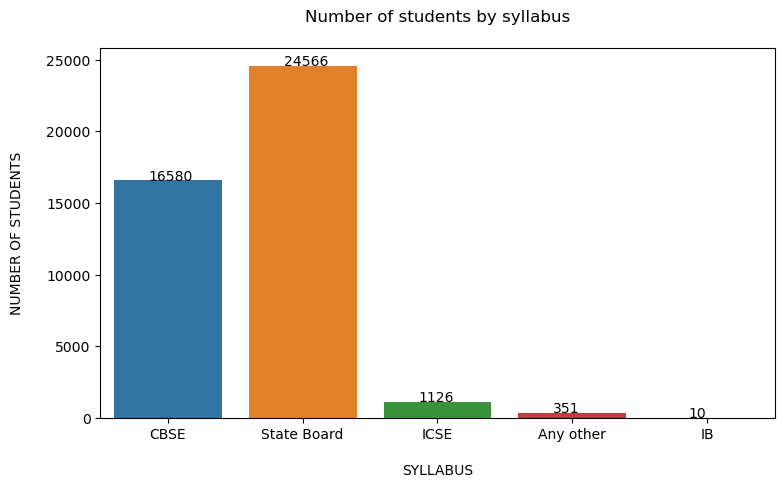

In [12]:
viz1 = sns.countplot(x = "syllabus", data = datanew)
viz1.figure.set_figwidth(8.7)
for p in viz1.patches:
    viz1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.26, p.get_height()))

plt.xlabel("SYLLABUS", labelpad=16)
plt.ylabel("NUMBER OF STUDENTS", labelpad=16)
plt.title("Number of students by syllabus", y=1.05)
plt.show()

#### Understanding the sample size distribution through opinion

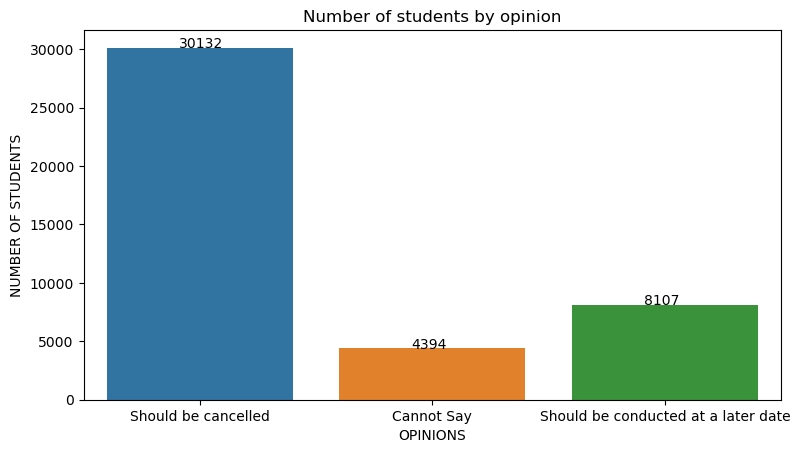

In [13]:
viz2 = sns.countplot(x = "opinion", data = datanew)
viz2.figure.set_figwidth(9)
for p in viz2.patches:
    viz2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.31, p.get_height()))

plt.xlabel("OPINIONS")
plt.ylabel("NUMBER OF STUDENTS")
plt.title("Number of students by opinion")
plt.show()

#### Imbalanced data to balanced data

In [14]:
datanew.head()

,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,NaN,Ahmedabad
6,State Board,Uncertain;Inability to concentrate;Confused,Cannot Say,NaN,NaN,State


Since the data is inmbalanced between the students who want the exams canceled and the students who want the exams to be conducted later we seperate the data and conduct individual analysis on both datasets

In [15]:
exam_cancel_data = datanew[datanew['opinion'] == 'Should be cancelled']
exam_conduct_later_data = datanew[datanew['opinion'] == 'Should be conducted at a later date']
print(len(exam_cancel_data),'number of students want the exams canceled')
print(len(exam_conduct_later_data),'number of students want the exams to be conducted later')

30132 number of students want the exams canceled
8107 number of students want the exams to be conducted later


In [16]:
exam_cancel_data.head()

,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,NaN,Ahmedabad
7,CBSE,Depressed;Anxious;Agitated;Inability to concen...,Should be cancelled,"Status of mind & safety,health",NaN,Cbse


In [17]:
exam_conduct_later_data.head()

,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state
9,State Board,Confused,Should be conducted at a later date,NaN,\nI suggest conducting it online or at a later...,Karnataka
25,CBSE,Excited,Should be conducted at a later date,NaN,On what basis will u get admission in college?...,Gujarat
27,CBSE,Depressed;Anxious;Agitated;Uncertain;Inability...,Should be conducted at a later date,NaN,"Unable to concentrate for more time, worried o...",Tamilnadu
28,CBSE,Uncertain;Inability to concentrate;More time f...,Should be conducted at a later date,NaN,The main reason is safety that is most of the ...,ABISHEK.S
29,State Board,Anxious;Uncertain,Should be conducted at a later date,NaN,Future',Gujarat


#### Text Pre Processing
- Text preprocessing is a technique used to clean textual data to a form where Natural Language Processing can be analyzed, and the results can be accurate.

In [18]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

- We clean reason canceling response data
- We clean reason conducting later response data

In [19]:
# To bypass the warning
pd.options.mode.chained_assignment = None  # default='warn'

In [20]:
# clean text data
exam_cancel_data["reason_cancelling_cleaned"] = exam_cancel_data["reason_cancelling"].apply(lambda x: clean_text(x))
exam_conduct_later_data["reason_conduct_later_cleaned"] = exam_conduct_later_data["reason_conduct_later"].apply(lambda x: clean_text(x))

In [21]:
exam_cancel_data.head()

,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state,reason_cancelling_cleaned
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat,"safety,status mind"
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka,think get college use pu mark mark card import...
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka,safety definitely number one reason here.on ha...
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,NaN,Ahmedabad,safety
7,CBSE,Depressed;Anxious;Agitated;Inability to concen...,Should be cancelled,"Status of mind & safety,health",NaN,Cbse,"status mind safety,health"


In [22]:
exam_conduct_later_data.head()

,syllabus,emotion,opinion,reason_cancelling,reason_conduct_later,state,reason_conduct_later_cleaned
9,State Board,Confused,Should be conducted at a later date,NaN,\nI suggest conducting it online or at a later...,Karnataka,\ni suggest conduct online later date.\ni canc...
25,CBSE,Excited,Should be conducted at a later date,NaN,On what basis will u get admission in college?...,Gujarat,basis get admission college exam everyone copy
27,CBSE,Depressed;Anxious;Agitated;Uncertain;Inability...,Should be conducted at a later date,NaN,"Unable to concentrate for more time, worried o...",Tamilnadu,unable concentrate time worried future need pl...
28,CBSE,Uncertain;Inability to concentrate;More time f...,Should be conducted at a later date,NaN,The main reason is safety that is most of the ...,ABISHEK.S,main reason safety standard board exam appear ...
29,State Board,Anxious;Uncertain,Should be conducted at a later date,NaN,Future',Gujarat,future


## Sentiment analysis
- Sentiment analysis describes whether a particular text is negative, positive, or neutral sentiment.
- To do so Lexicon-based sentiment analysis has been used. A lexicon sentiment is a list of lexicon words labeled according to their semantic orientation, positive, negative or neutral.
- Vader lexicon sentiment analysis identifies the negative, positive, neutral and compound score of each responses.

#### Vader Lexicon Sentiment Analysis on students who want the exams canceled

In [23]:
neg_cancel_data = []
pos_cancel_data = []
neu_cancel_data = []
compound_score_cancel_data = []

analyzer = SentimentIntensityAnalyzer()
for cleaned_text in exam_cancel_data["reason_cancelling_cleaned"]:
    vs = analyzer.polarity_scores(cleaned_text)
    negative = vs['neg']
    positive = vs['pos']
    neutral = vs['neu']
    compound = vs['compound']
    neg_cancel_data.append(float(negative))
    pos_cancel_data.append(float(positive))
    neu_cancel_data.append(float(neutral))
    compound_score_cancel_data.append(compound)

In [24]:
cancel_data_sentiments = {'syllabus': exam_cancel_data['syllabus'],'emotion': exam_cancel_data['emotion'],'opinion': exam_cancel_data['opinion'],'reason_canceling' : exam_cancel_data["reason_cancelling"],'neg': neg_cancel_data,'pos': pos_cancel_data,'neu': neu_cancel_data,'compound': compound_score_cancel_data} 
exam_cancel_data_sentiments = pd.DataFrame(cancel_data_sentiments, columns= ['syllabus','emotion','opinion', 'reason_canceling','neg','pos','neu','compound'])
exam_cancel_data_sentiments.head()

,syllabus,emotion,opinion,reason_canceling,neg,pos,neu,compound
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",0.000,0.000,1.000,0.0000
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,0.136,0.186,0.679,0.3134
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,0.178,0.257,0.566,0.7041
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,0.000,1.000,0.000,0.4215
7,CBSE,Depressed;Anxious;Agitated;Inability to concen...,Should be cancelled,"Status of mind & safety,health",0.000,0.000,1.000,0.0000


In [25]:
exam_cancel_data_sentiments['sentiment'] = 'neutral'
exam_cancel_data_sentiments.loc[exam_cancel_data_sentiments['compound'] >= 0.25, 'sentiment'] = 'positive'
exam_cancel_data_sentiments.loc[exam_cancel_data_sentiments['compound'] <= -0.25, 'sentiment'] = 'negative'
exam_cancel_data_sentiments.head()

,syllabus,emotion,opinion,reason_canceling,neg,pos,neu,compound,sentiment
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",0.000,0.000,1.000,0.0000,neutral
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,0.136,0.186,0.679,0.3134,positive
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,0.178,0.257,0.566,0.7041,positive
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,0.000,1.000,0.000,0.4215,positive
7,CBSE,Depressed;Anxious;Agitated;Inability to concen...,Should be cancelled,"Status of mind & safety,health",0.000,0.000,1.000,0.0000,neutral


#### Vader Lexicon Sentiment Analysis on students who want the exams to be conducted later

In [26]:
neg_later_data = []
pos_later_data = []
neu_later_data = []
compound_score_later_data = []

analyzer = SentimentIntensityAnalyzer()
for cleaned_text in exam_conduct_later_data["reason_conduct_later_cleaned"]:
    vs = analyzer.polarity_scores(cleaned_text)
    negative = vs['neg']
    positive = vs['pos']
    neutral = vs['neu']
    compound = vs['compound']
    neg_later_data.append(float(negative))
    pos_later_data.append(float(positive))
    neu_later_data.append(float(neutral))
    compound_score_later_data.append(compound)

In [27]:
later_data_sentiments = {'syllabus': exam_conduct_later_data['syllabus'],'emotion': exam_conduct_later_data['emotion'],'opinion': exam_conduct_later_data['opinion'],'reason_conduct_later' : exam_conduct_later_data["reason_conduct_later"],'neg': neg_later_data,'pos': pos_later_data,'neu': neu_later_data,'compound': compound_score_later_data} 
exam_conduct_later_data_sentiments = pd.DataFrame(later_data_sentiments, columns= ['syllabus','emotion','opinion', 'reason_conduct_later','neg','pos','neu','compound'])
exam_conduct_later_data_sentiments.head()

,syllabus,emotion,opinion,reason_conduct_later,neg,pos,neu,compound
9,State Board,Confused,Should be conducted at a later date,\nI suggest conducting it online or at a later...,0.201,0.125,0.674,-0.4939
25,CBSE,Excited,Should be conducted at a later date,On what basis will u get admission in college?...,0.000,0.000,1.000,0.0000
27,CBSE,Depressed;Anxious;Agitated;Uncertain;Inability...,Should be conducted at a later date,"Unable to concentrate for more time, worried o...",0.108,0.206,0.686,0.2500
28,CBSE,Uncertain;Inability to concentrate;More time f...,Should be conducted at a later date,The main reason is safety that is most of the ...,0.080,0.180,0.740,0.4767
29,State Board,Anxious;Uncertain,Should be conducted at a later date,Future',0.000,0.000,1.000,0.0000


In [28]:
exam_conduct_later_data_sentiments['sentiment'] = 'neutral'
exam_conduct_later_data_sentiments.loc[exam_conduct_later_data_sentiments['compound'] >= 0.25, 'sentiment'] = 'positive'
exam_conduct_later_data_sentiments.loc[exam_conduct_later_data_sentiments['compound'] <= -0.25, 'sentiment'] = 'negative'
exam_conduct_later_data_sentiments.head()

,syllabus,emotion,opinion,reason_conduct_later,neg,pos,neu,compound,sentiment
9,State Board,Confused,Should be conducted at a later date,\nI suggest conducting it online or at a later...,0.201,0.125,0.674,-0.4939,negative
25,CBSE,Excited,Should be conducted at a later date,On what basis will u get admission in college?...,0.000,0.000,1.000,0.0000,neutral
27,CBSE,Depressed;Anxious;Agitated;Uncertain;Inability...,Should be conducted at a later date,"Unable to concentrate for more time, worried o...",0.108,0.206,0.686,0.2500,positive
28,CBSE,Uncertain;Inability to concentrate;More time f...,Should be conducted at a later date,The main reason is safety that is most of the ...,0.080,0.180,0.740,0.4767,positive
29,State Board,Anxious;Uncertain,Should be conducted at a later date,Future',0.000,0.000,1.000,0.0000,neutral


## Exporting the datasets 

In [29]:
#with pd.ExcelWriter('Sentiment_Analysis_Results.xlsx', engine='xlsxwriter') as writer:
    #exam_cancel_data_sentiments.to_excel(writer, sheet_name='cancel_data_sentiments')
    #exam_conduct_later_data_sentiments.to_excel(writer, sheet_name='later_data_sentiments')

## Word Frequency
#### Number of times a student has used an emotion and grouping it by their sentiments

#### Seperating each emotion by comma

In [30]:
exam_cancel_data_sentiments['words'] = exam_cancel_data_sentiments['emotion'].str.split(";")
exam_conduct_later_data_sentiments['words'] = exam_conduct_later_data_sentiments['emotion'].str.split(";")

#### Grouping the number of times an emotion has been used by sentiments

In [31]:
exam_cancel_data_sentiments_word_frequency = exam_cancel_data_sentiments.explode('words').groupby('sentiment')['words'].value_counts()
exam_conduct_later_data_sentiments_word_frequency = exam_conduct_later_data_sentiments.explode('words').groupby('sentiment')['words'].value_counts()

In [32]:
exam_cancel_data_sentiments_word_frequency

sentiment  words                    
negative   Stress                       4626
           Confused                     3835
           Depressed                    3681
           Inability to concentrate     3658
           Sad                          2668
           Anxious                      2471
           Uncertain                    1927
           Agitated                     1301
           More time for preparation     476
           Happy                         181
           Excited                       143
           Relieved                      131
neutral    Stress                       6448
           Confused                     5615
           Depressed                    5023
           Inability to concentrate     4711
           Sad                          3788
           Anxious                      2891
           Uncertain                    2225
           Agitated                     1349
           More time for preparation     854
           Happy  

In [33]:
exam_conduct_later_data_sentiments_word_frequency

sentiment  words                    
negative   Confused                      344
           Stress                        294
           Inability to concentrate      274
           Anxious                       199
           Depressed                     180
           Uncertain                     173
           Sad                           143
           More time for preparation     139
           Agitated                       65
           Happy                          26
           Excited                        24
           Relieved                       19
neutral    Confused                     2026
           Stress                       1482
           Inability to concentrate     1431
           More time for preparation     984
           Depressed                     938
           Sad                           830
           Anxious                       810
           Uncertain                     693
           Happy                         319
           Excited

#### Converting series to dataframe

In [34]:
exam_cancel_data_sentiments_word_frequency = exam_cancel_data_sentiments_word_frequency.to_frame(name = 'count')
exam_conduct_later_data_sentiments_word_frequency = exam_conduct_later_data_sentiments_word_frequency.to_frame(name = 'count')

#### Resetting the index

In [35]:
exam_cancel_data_sentiments_word_frequency.reset_index(inplace=True)
exam_conduct_later_data_sentiments_word_frequency.reset_index(inplace=True)

In [36]:
exam_cancel_data_sentiments_word_frequency.head()

,sentiment,words,count
0,negative,Stress,4626
1,negative,Confused,3835
2,negative,Depressed,3681
3,negative,Inability to concentrate,3658
4,negative,Sad,2668


In [37]:
exam_conduct_later_data_sentiments_word_frequency.head()

,sentiment,words,count
0,negative,Confused,344
1,negative,Stress,294
2,negative,Inability to concentrate,274
3,negative,Anxious,199
4,negative,Depressed,180


#### Adding an attribute called opinions in the dataframe

In [38]:
exam_cancel_data_sentiments_word_frequency['opinion'] = 'Should be cancelled'
exam_conduct_later_data_sentiments_word_frequency['opinion'] = 'Should be conducted later'

In [39]:
exam_cancel_data_sentiments_word_frequency.head()

,sentiment,words,count,opinion
0,negative,Stress,4626,Should be cancelled
1,negative,Confused,3835,Should be cancelled
2,negative,Depressed,3681,Should be cancelled
3,negative,Inability to concentrate,3658,Should be cancelled
4,negative,Sad,2668,Should be cancelled


In [40]:
exam_conduct_later_data_sentiments_word_frequency.head()

,sentiment,words,count,opinion
0,negative,Confused,344,Should be conducted later
1,negative,Stress,294,Should be conducted later
2,negative,Inability to concentrate,274,Should be conducted later
3,negative,Anxious,199,Should be conducted later
4,negative,Depressed,180,Should be conducted later


## Exporting the dataset

In [41]:
#with pd.ExcelWriter('Word_Frequency_Results.xlsx', engine='xlsxwriter') as writer:
    #exam_cancel_data_sentiments_word_frequency.to_excel(writer, sheet_name='exam_cancel_word_frequency')
    #exam_conduct_later_data_sentiments_word_frequency.to_excel(writer, sheet_name='exam_later_word_frequency')